# Import Packages

In [3]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pickle
import cv2
import glob
import math
# when you want an inline plot
%matplotlib inline
#when you want graphs in a separate window
# %matplotlib qt 

# Helper Functions

In [4]:
import math



def get_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def undistort_images(img, objpoits, imgpoits):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoits, imgpoits, get_grayscale(img).shape[::-1], None, None)
    return cv2.undistort(img, mtx, dist, None, mtx)

def get_hls(img):
#     hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
#     S = hls[:,:,2]
#     binary_output = np.zeros_like(S)
#     binary_output[(S > thresh[0]) & (S <= thresh[1])] = 1
    return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

def get_lab(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2LAB  )


def read_images(path_name, rgb=True):
    img = cv2.imread(path_name)
    return img if not rgb else cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def get_undist_images(img, objpoints, imgpoints):
#     undist_img = 0
    # Test undistortion on an image
#     for img in images:
    img_size = (img.shape[1], img.shape[0])
        # Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    undst = cv2.undistort(img, mtx, dist, None, mtx)
#         undist_imgs.append(undst)
#         cv2.imwrite('calibration_wide/test_undist.jpg',undst)
    # Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
    pickle.dump( dist_pickle, open( "wide_dist_pickle.p", "wb" ))
    return undst

def get_corners_images(images, objp):
    cor_imgs = []
    origin_imgs = []
    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    # Make a list of calibration images
#     images = glob.glob('../camera_cal/calibration*.jpg')
    # Step through the list and search for chessboard corners
    for img in images:
#         image_name, img = images_list[i]
#         img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            # Draw and display the corners
            img_corn = cv2.drawChessboardCorners(img.copy(), (9,6), corners, ret)
            cor_imgs.append(img_corn)
            original_imgs.append(img)
            img_corn = 0
    #         cv2.imshow('img',img)
    #         cv2.waitKey(500)

    # cv2.destroyAllWindows()
    return cor_imgs, objpoints, imgpoints

def show_images(images_list, imgs_names, pref="",  fig_size=(14,14), cols=5, cmap=None):
#     cols=3
#     fig_size=(15,15)
    
#     cmap = None
    num_img = len(images_list)
    r = num_img / cols
    if isinstance(r, float):
        rows = math.ceil(r)             
    plt.figure(figsize=fig_size)
    for i in range(num_img):
        img = images_list[i]
        if len(img.shape) < 3 or img.shape[-1] < 3:
                cmap = "gray"
                img = np.reshape(img, (img.shape[0], img.shape[1]))
        plt.subplot(rows, cols, i+1)
        plt.title(pref + imgs_names[i])
#         RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img, cmap=cmap)
    plt.tight_layout()
    plt.show()    
#     fig, axes = plt.subplots(rows, cols, figsize=fig_size)
#     indexes = range(cols * rows)
#     for ax, index in zip(axes.flat, indexes):
#         if index < num_img:
#             img = images_list[index-1]
#             if cmap == None:
#                 RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#                 ax.imshow(RGB_img)
#             else:
#                 ax.imshow(img, cmap="gray")
#             ax.set_title(pref + imgs_names[index-1])
#             ax.axis('Off')
 
    
    
def display_images(images_list, cols = 4, rows = 5, fig_size=(14,14), cmap = None):
    num_img = len(images_list)
    fig, axes = plt.subplots(rows, cols, figsize=fig_size)
    indexes = range(cols * rows)
    for ax, index in zip(axes.flat, indexes):
        if index < num_img:
            img_name, img = images_list[index]
            if cmap == None:
                ax.imshow(img)
            else:
                ax.imshow(img, cmap=cmap)
            ax.set_title(img_name)
            ax.axis('Off')

def show_all_images(images, names, cols=2, fig_size=(20, 15)):
    rows = len(images)
    cmap = None
    fig, axes = plt.subplots(rows, cols, figsize=fig_size)
    for i in range(0, rows):
        for j in range(0, cols):
            ax = axes[i, j] if rows > 1 else axes[j]
            image_name = names[i][j]
            img = images[i][j]
            if len(img.shape) < 3 or img.shape[-1] < 3:
                cmap = "gray"
                img = np.reshape(img, (img.shape[0], img.shape[1]))
            ax.imshow(img, cmap=cmap)
            ax.set_title(image_name, fontsize=20)
    fig.tight_layout()
    plt.show()
            
def read_image(img):
    return mpimg.imread(os.path.join(img))

def save_image(images_list, caption, pref="test", folder="output_images"):
    if not os.path.exists(folder):
        os.mkdir(folder)
    for img, name in zip(images_list, caption):
        path = folder + "/" + pref + "_" + name
        Image.fromarray(img).save(path)

# Read in an Images

In [5]:
import os
path = "camera_cal/"
imgs_names = os.listdir(path)
imgs_names_path = list(map(lambda name: path + name, imgs_names))
calibrat_images = [read_image(path + name) for name in imgs_names]
# original_imgs = np.copy(all_images)

# calibrat_images = list(map(lambda image_name: (image_name, cv2.imread(image_name)), glob.glob('./camera_cal/c*.jpg')))

print(len(calibrat_images))

20


# Function used to show a list of images

20


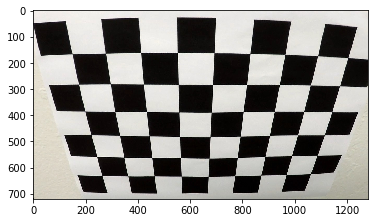

In [6]:
print(len(calibrat_images))
plt.imshow(calibrat_images[2])
# show_images(calibrat_images, imgs_names, pref="", cols=4)

# Build a Lane Finding Pipeline
<font size="3">The goals / steps of this project are the following:

- Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
- Apply a distortion correction to raw images.
- Use color transforms, gradients, etc., to create a thresholded binary image.
- Apply a perspective transform to rectify binary image ("birds-eye view").
- Detect lane pixels and fit to find the lane boundary.
- Determine the curvature of the lane and vehicle position with respect to center.
- Warp the detected lane boundaries back onto the original image.
- Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.</font>

# Step 1: Compute the camera calibration matrix and distortion coefficients

Corner images found: 17
Origin images found: 17


True

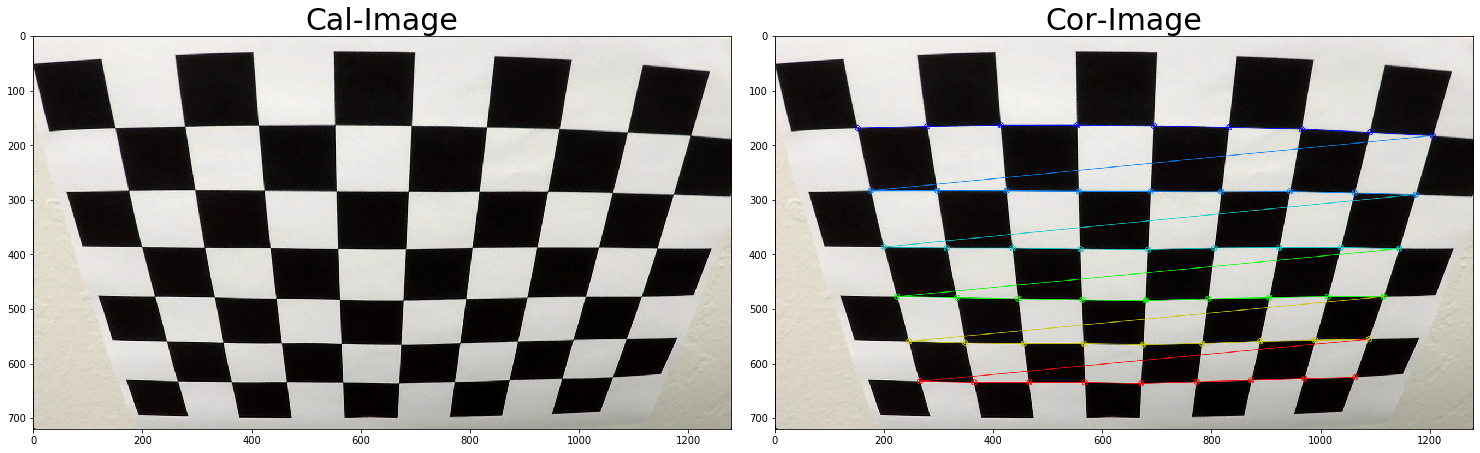

In [10]:
objpoints = []
imgpoints = []
corners_imgs = []
original_imgs = []

# print(len(cal_images))
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) #that will shape coordinate back to two colomns x and y

corners_imgs, objpoints, imgpoints = get_corners_images(calibrat_images, objp)
# show_images(cal_imgs, imgs_names, pref="Cali_")
# Visualize undistortion
# print('Image with cr found: {}'.format(len(outimages)))
print('Corner images found: {}'.format(len(corners_imgs)))
print('Origin images found: {}'.format(len(original_imgs)))
indx =1
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(20,10))
fig.tight_layout()
ax_1.imshow(original_imgs[indx]), ax_1.set_title('Cal-Image', fontsize=30)
ax_2.imshow(corners_imgs [indx]), ax_2.set_title('Cor-Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# cv2.imwrite('output_images/calibr_1.jpg', original_imgs[indx])
# cv2.imwrite('output_images/calibr_2.jpg', corners_imgs [indx])

# Step 2: Calibrate, calculate distortion coefficients, and test undistortion on images

True

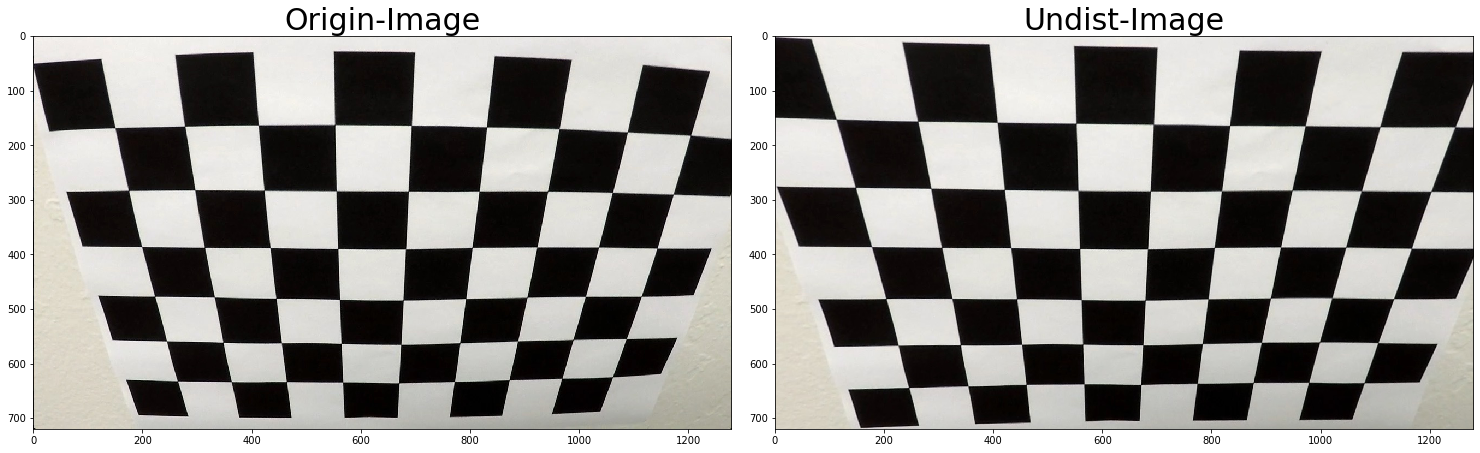

In [11]:
indx = 1
undist_imgs = get_undist_images(original_imgs[indx], objpoints, imgpoints)
# show_images(undist_imgs, imgs_names, pref = "Undist_")

fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(20,10))
fig.tight_layout()
ax_1.imshow(original_imgs[indx]), ax_1.set_title('Origin-Image', fontsize=30)
ax_2.imshow(undist_imgs), ax_2.set_title('Undist-Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# cv2.imwrite('output_images/undist_1.jpg', original_imgs[indx])
# cv2.imwrite('output_images/undist_2.jpg', undist_imgs)

## Apply a distortion correction to test images.

In [13]:
test_images_names_paths = glob.glob('./test_images/*.jpg')
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

In [14]:
def combine_names(images, fun):
    return list(map(lambda img: (img[0], fun(img[1])), images))

def show(images, fun, cmap='gray'):
    comb_images = combine_names(images, fun)
    display_images( comb_images, 2, 4, (15, 15), cmap=cmap)
    return display_images

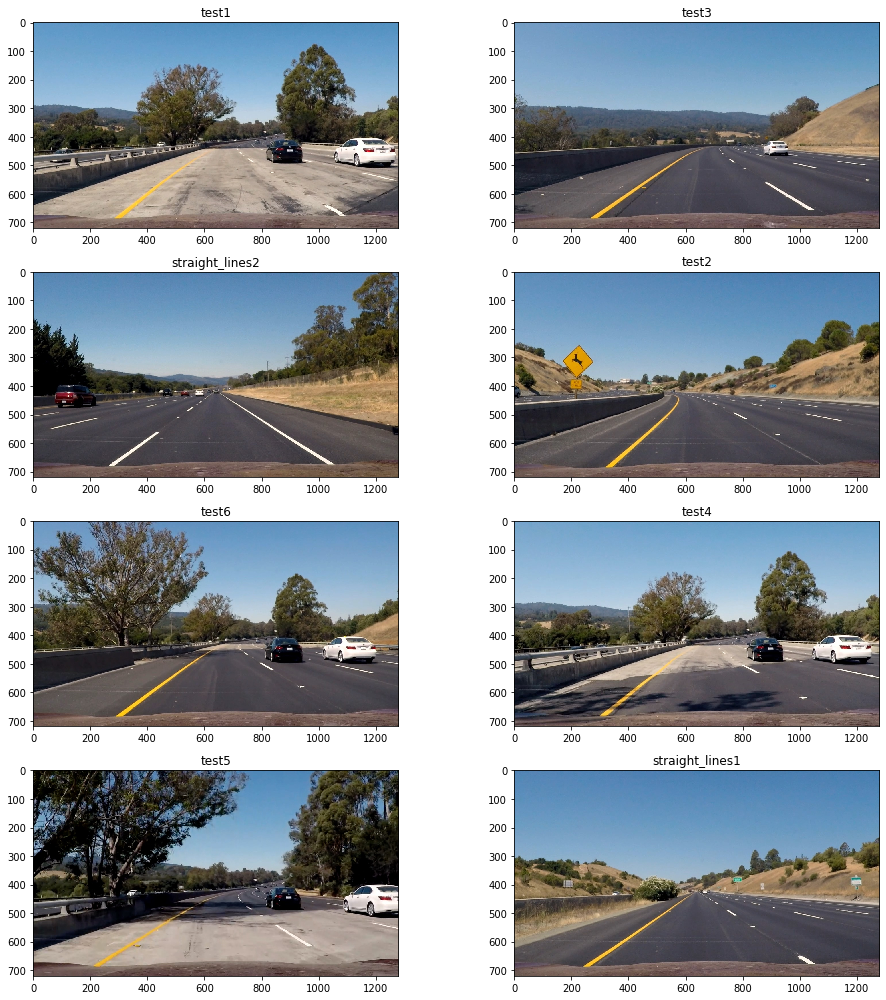

In [15]:
# Read test images with names
test_images = np.asarray(list(map(lambda img_path: read_images(img_path), test_images_names_paths)))
test_images_names = np.asarray(list(map(lambda path: path.split("/")[-1].split(".")[0], test_images_names_paths)))

test_images_pair = list(map(lambda image_name: (image_name, cv2.imread(image_name)), glob.glob('./test_images/*.jpg')))
test_images_list = list(map(lambda image_name: cv2.imread(image_name), glob.glob('./test_images/*.jpg')))
# names = list(map(lambda image_name: image_name, glob.glob('./test_images/*.jpg')))

# print(test_images_pair)
show_images(test_images, test_images_names, cols = 2, pref = "")
# print(test_images_names)
# print("----------------------")
# print(names)
# test_images = list(map(lambda image_file_name: (image_file_name, cv2.imread(image_file_name)), glob.glob('./test_images/*.jpg')))
# show_all_images(test_images, test_images_names_paths, cols = 4, fig_size = (20,15))
# display_images(list(map(lambda image: (image[0], cv2.cvtColor(image[1], cv2.COLOR_BGR2RGB)),test_images)),2, 4,)

In [16]:
# import os
# path = "test_images/"
# test_images_names_no_path = os.listdir(path)
# test_images = [read_image(path + name) for name in org_img_names]

# images = glob.glob('./test_images/*.jpg')
# # Step through the list and search for chessboard corners
# test_images_brg = []
# test_images_names_w_path = []
# for idx, fname in enumerate(images): #idx start from 0 to len(images)
#     img = cv2.imread(fname) # the image is BRG and need to conver to RBG ##########################
#     test_images_brg.append(img)
#     test_images_names_w_path.append(fname)

In [17]:
# show_images(test_images, test_images_names_no_path, pref = "", cols = 2)

In [22]:
undist_images = np.asarray(list(map(lambda img: undistort_images(img, objpoints, imgpoints), test_images)))
undist_images_names = np.asarray(list(map(lambda img_name: "{0}{1}".format("Undist._", img_name), test_images_names)))

# cv2.imwrite('output_images/undist_test_1.jpg', cv2.cvtColor(undist_images[0], cv2.COLOR_BGR2RGB))
# cv2.imwrite('output_images/undist_test_2.jpg', cv2.cvtColor(undist_images[1], cv2.COLOR_BGR2RGB))

True

In [19]:
# undist_images_pair = list(map(lambda image_name, img: image_name, img, (glob.glob('./test_images/*.jpg'), undist_images)))
# print(len(undist_images_pair))

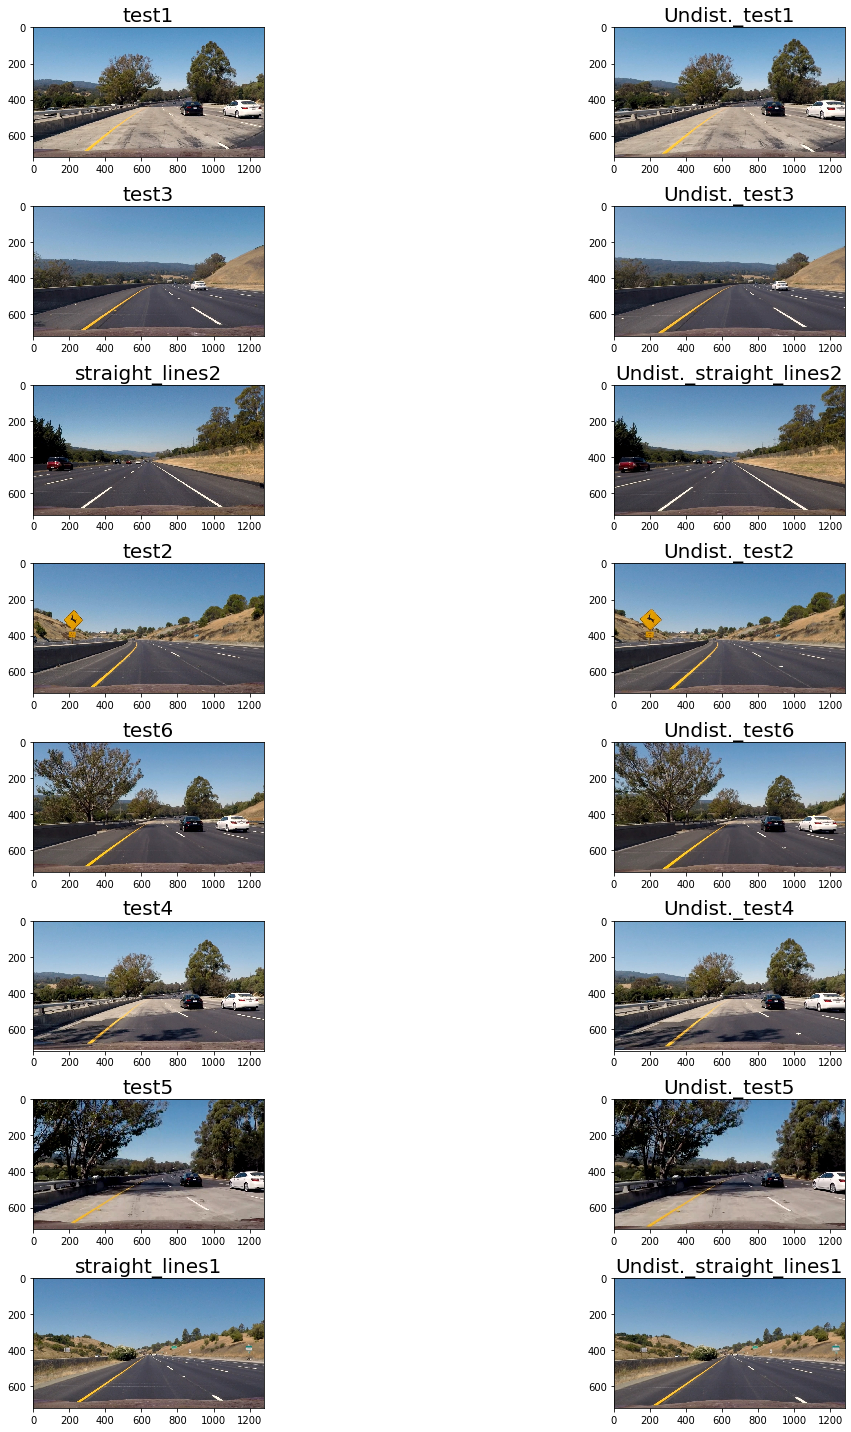

In [23]:
test_and_undist = np.asarray(list(zip(test_images, undist_images)))
test_and_undist_names = np.asarray(list(zip(test_images_names, undist_images_names)))
show_all_images(test_and_undist, test_and_undist_names, cols = 2, fig_size = (20,20))



# Step 3: Use color transforms, gradients, etc., to create a thresholded binary image

## Color Thresholding
---------------------------

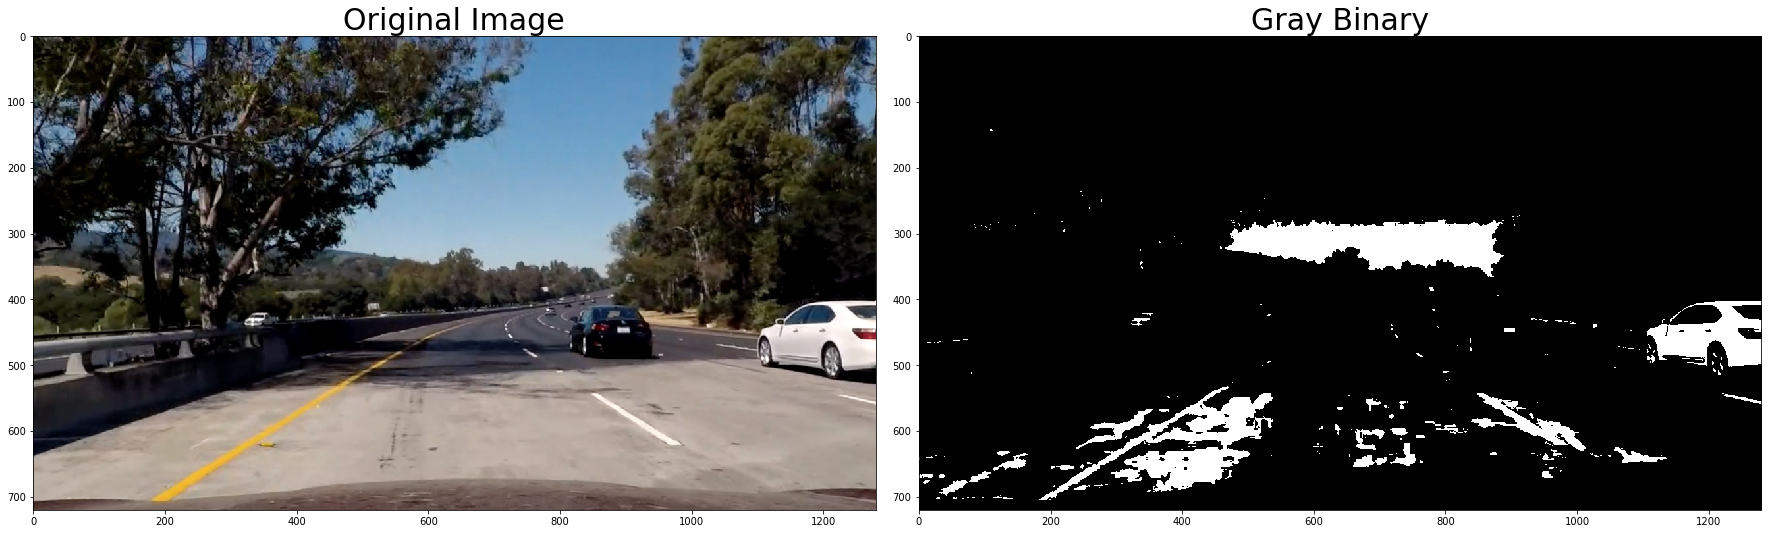

In [24]:
test_image_name = test_images_names [6]
test_image_name_path = test_images_names_paths [6]
test_image = read_images(test_image_name_path)
undistorted_test_image = undistort_images(test_image, objpoints, imgpoints)
# print(test_image_name)undistor_images()
# print(test_image_name_path)
# plt.imshow(test_image)

thresh = (180, 255)
gray = cv2.cvtColor(undistorted_test_image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(undistorted_test_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(binary, cmap='gray')
ax2.set_title('Gray Binary', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## RGB Channels

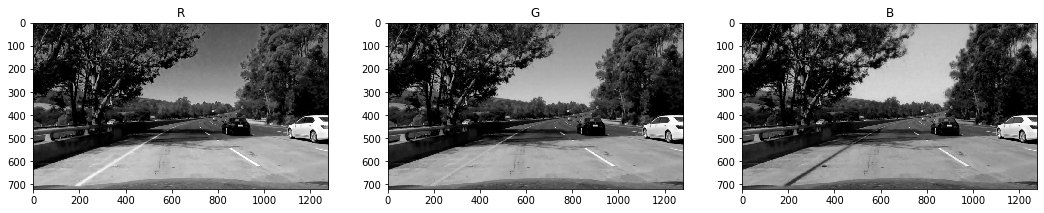

True

In [84]:
R = undistorted_test_image[:,:,0]
G = undistorted_test_image[:,:,1]
B = undistorted_test_image[:,:,2]

f, axarr = plt.subplots(nrows=1,ncols=3, figsize=(18, 6))
plt.sca(axarr[0]); plt.imshow(R, cmap='gray'); plt.title('R')
plt.sca(axarr[1]); plt.imshow(G, cmap='gray'); plt.title('G')
plt.sca(axarr[2]); plt.imshow(B, cmap='gray'); plt.title('B')
plt.show()

# cv2.imwrite('output_images/rbg_test_1.jpg', cv2.cvtColor(R, cv2.COLOR_BGR2RGB))
# cv2.imwrite('output_images/rbg_test_2.jpg', cv2.cvtColor(G, cv2.COLOR_BGR2RGB))
# cv2.imwrite('output_images/rbg_test_3.jpg', cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
# cv2.imwrite('output_images/rbg_test_1.jpg', R)
# cv2.imwrite('output_images/rbg_test_2.jpg', G)
# cv2.imwrite('output_images/rbg_test_3.jpg', B)

#### The R channel does a reasonable job of highlighting the lines, and we can apply a similar threshold to find lane-line pixels:

Text(0.5, 1.0, 'R-binary')

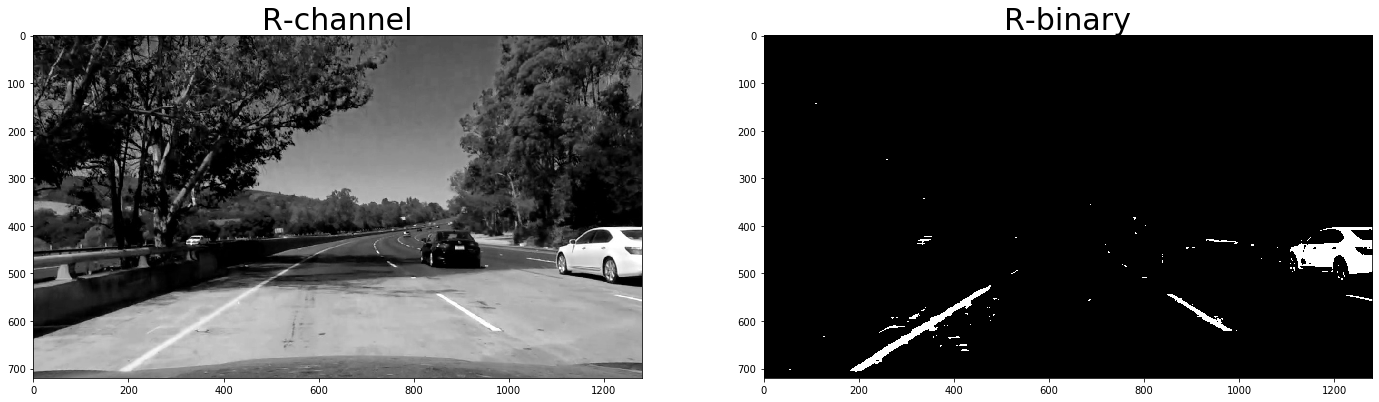

In [26]:
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1

f, axarr = plt.subplots(nrows=1,ncols=2, figsize=(24, 9))
plt.sca(axarr[0]); plt.imshow(R, cmap='gray');      plt.title('R-channel', fontsize=30)
plt.sca(axarr[1]); plt.imshow(binary, cmap='gray'); plt.title('R-binary', fontsize=30)

## Separate the H, L, and S channels

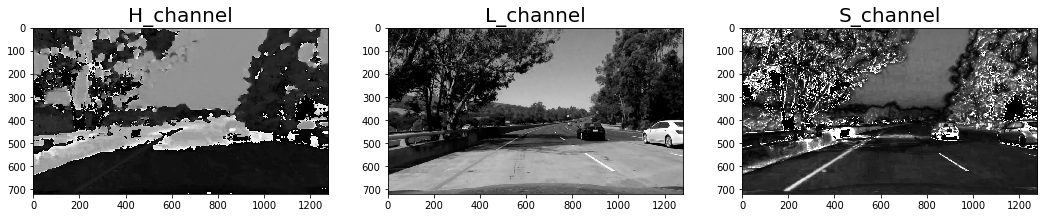

True

In [85]:
hls = cv2.cvtColor(undistorted_test_image, cv2.COLOR_RGB2HLS)
H_channel = hls[:,:,0]
L_channel = hls[:,:,1]
S_channel = hls[:,:,2]
f, axarr = plt.subplots(nrows=1,ncols=3, figsize=(18, 6))
plt.sca(axarr[0]); plt.imshow(H_channel, cmap='gray'); plt.title('H_channel', fontsize=20)
plt.sca(axarr[1]); plt.imshow(L_channel, cmap='gray'); plt.title('L_channel', fontsize=20)
plt.sca(axarr[2]); plt.imshow(S_channel, cmap='gray'); plt.title('S_channel', fontsize=20)
plt.show()

# cv2.imwrite('output_images/rbg_test_1.jpg', cv2.cvtColor(R, cv2.COLOR_BGR2RGB))
# cv2.imwrite('output_images/rbg_test_2.jpg', cv2.cvtColor(G, cv2.COLOR_BGR2RGB))
# cv2.imwrite('output_images/rbg_test_3.jpg', cv2.cvtColor(B, cv2.COLOR_BGR2RGB))

# cv2.imwrite('output_images/hls_test_1.jpg', H_channel)
# cv2.imwrite('output_images/hls_test_2.jpg', L_channel)
# cv2.imwrite('output_images/hls_test_3.jpg', S_channel)

**The S channel picks up the lines well, so let's try applying a threshold there:**

True

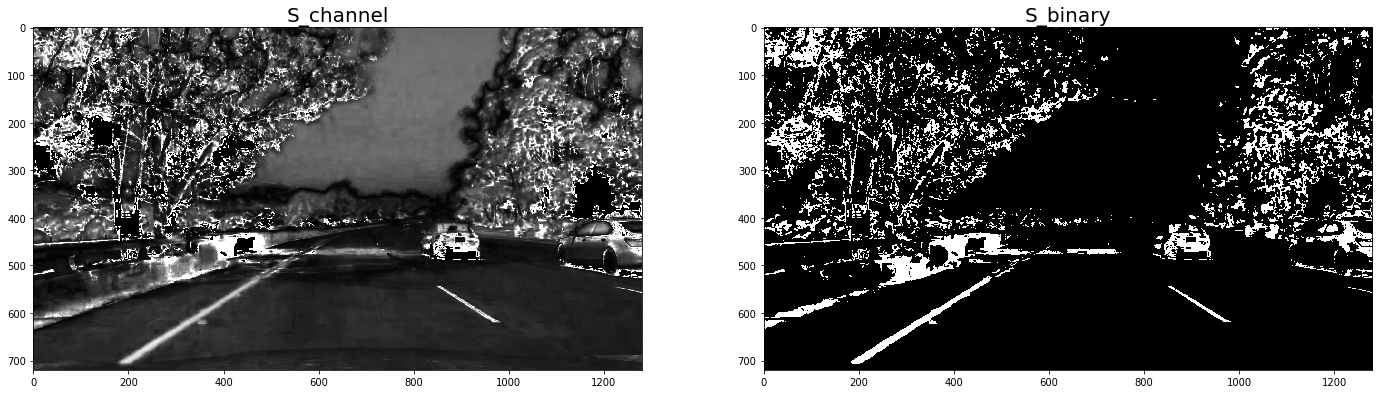

In [87]:
thresh = (120, 255) #90,255
S_binary = np.zeros_like(S_channel)
S_binary[(S_channel > thresh[0]) & (S_channel <= thresh[1])] = 1

f, axarr = plt.subplots(nrows=1,ncols=2, figsize=(24, 9))
plt.sca(axarr[0]); plt.imshow(S_channel, cmap='gray');      plt.title('S_channel', fontsize=20)
plt.sca(axarr[1]); plt.imshow(S_binary, cmap='gray'); plt.title('S_binary', fontsize=20)

# cv2.imwrite('output_images/rbg_test_1.jpg', cv2.cvtColor(R, cv2.COLOR_BGR2RGB))
# cv2.imwrite('output_images/rbg_test_2.jpg', cv2.cvtColor(G, cv2.COLOR_BGR2RGB))
# cv2.imwrite('output_images/rbg_test_3.jpg', cv2.cvtColor(B, cv2.COLOR_BGR2RGB))

cv2.imwrite('output_images/S_channel_1.jpg',S_channel)
cv2.imwrite('output_images/S_binary__2.jpg',S_binary)
# cv2.imwrite('output_images/hls_test_3.jpg', S_channel)

#### You can also see that in the H channel, the lane lines appear dark, so we could try a low threshold there and obtain the following result:

Text(0.5, 1.0, 'H_binary')

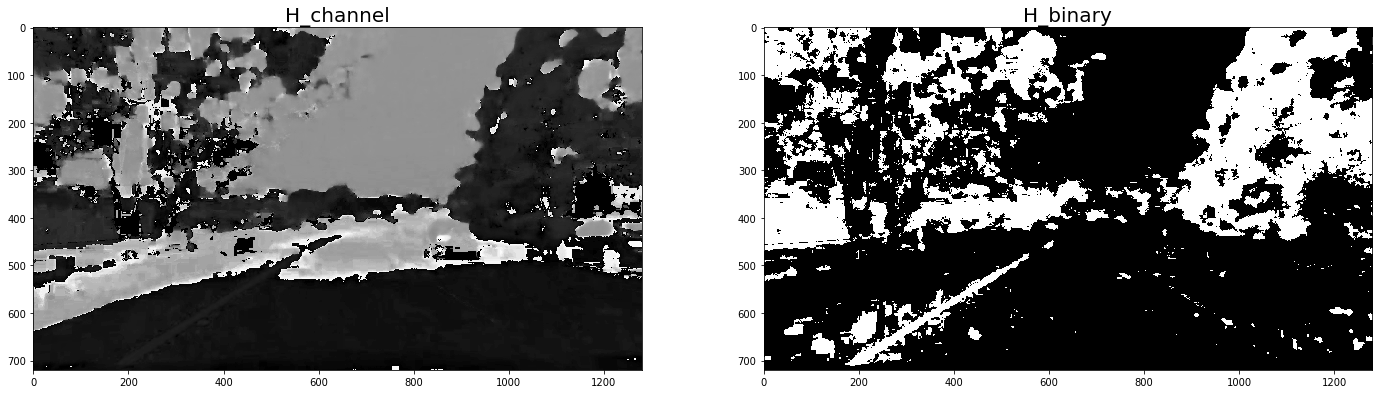

In [88]:
thresh = (15, 100)
binary = np.zeros_like(H_channel)
binary[(H_channel > thresh[0]) & (H_channel <= thresh[1])] = 1

f, axarr = plt.subplots(nrows=1,ncols=2, figsize=(24, 9))
plt.sca(axarr[0]); plt.imshow(H_channel, cmap='gray');      plt.title('H_channel', fontsize=20)
plt.sca(axarr[1]); plt.imshow(binary, cmap='gray'); plt.title('H_binary', fontsize=20)

### From these examples, you can see that the S channel is probably your best bet. It's cleaner than the H channel result and a bit better than the R channel or simple grayscaling. But it's not clear that one method is far superior to the others.


## Separate the L, A, and B channels

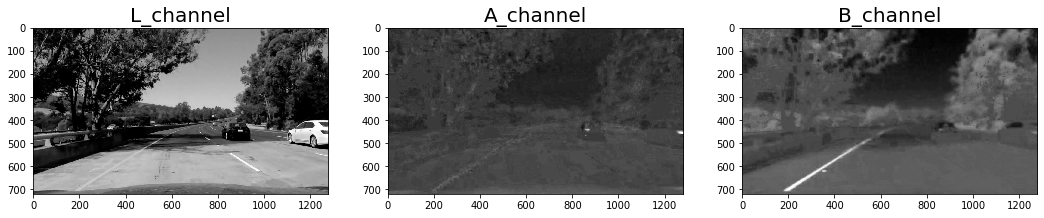

In [89]:
lab = get_lab(undistorted_test_image)
ll_channel = lab[:,:,0]
a_channel  = lab[:,:,1]
b_channel  = lab[:,:,2]
f, axarr = plt.subplots(nrows=1,ncols=3, figsize=(18, 6))
plt.sca(axarr[0]); plt.imshow(ll_channel,cmap='gray'); plt.title('L_channel', fontsize=20)
plt.sca(axarr[1]); plt.imshow(a_channel, cmap='gray'); plt.title('A_channel', fontsize=20)
plt.sca(axarr[2]); plt.imshow(b_channel, cmap='gray'); plt.title('B_channel', fontsize=20)
plt.show()

In [90]:
def get_y_w_hls_images(img):
    
    hls_image =  cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
#     hls_image =  get_hls(img)
    
    # White isolated from HLS components
    w_hls = np.zeros_like(hls_image[:,:,0])
    w_hls[((hls_image[:,:,0] >= 0)   & (hls_image[:,:,0] <= 255))
        & ((hls_image[:,:,1] >= 210) & (hls_image[:,:,1] <= 255))
        & ((hls_image[:,:,2] >= 0)   & (hls_image[:,:,2] <= 255))] = 1
    # Yellow isolated from HLS components
    y_hls = np.zeros_like(hls_image[:,:,0])
#     y_hls[((hls_image[:,:,0] >= 15)  & (hls_image[:,:,0] <= 35)) #20,20,90  30,200,255
#         & ((hls_image[:,:,1] >= 30)  & (hls_image[:,:,1] <= 204))#15,30,115 35,204,255
#         & ((hls_image[:,:,2] >= 100) & (hls_image[:,:,2] <= 255))] = 1
    y_hls[((hls_image[:,:,0] >= 20)  & (hls_image[:,:,0] <= 30)) #20,20,90  30,200,255
        & ((hls_image[:,:,1] >= 20)  & (hls_image[:,:,1] <= 200))#15,30,115 35,204,255
        & ((hls_image[:,:,2] >= 90) & (hls_image[:,:,2] <= 255))] = 1
    
    hls_w_y = np.zeros_like(hls_image[:,:,0])
    hls_w_y[(w_hls == 1) | (y_hls == 1) ] = 1
#     mask = cv2.bitwise_or(w_hls, y_hls)
#     hls_w_y = cv2.bitwise_and(img, img, mask = mask)

    return hls_w_y

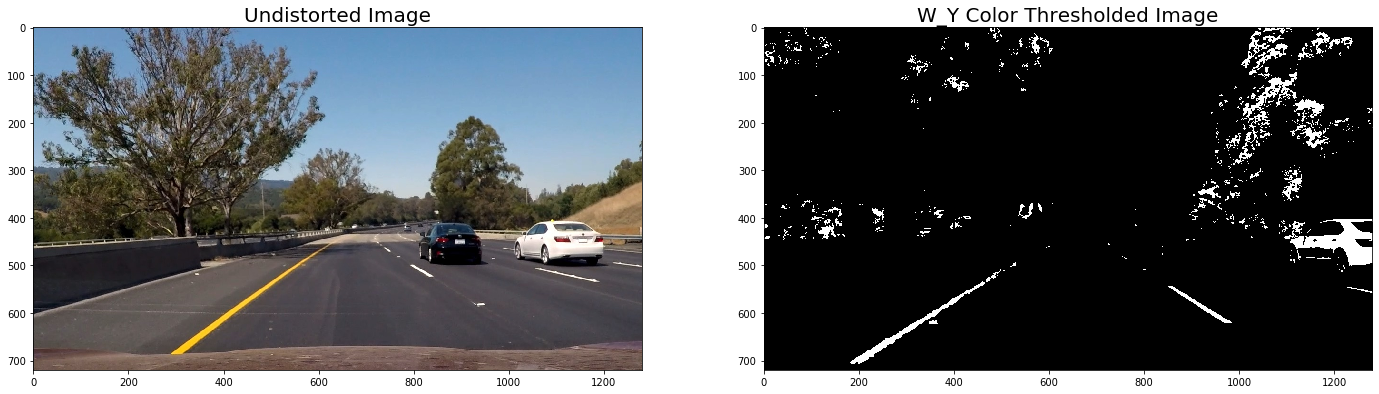

In [91]:
# undistorted_y_w_hls = get_y_w_hls_images(undistorted_test_image)
undistorted_y_w_hls = get_y_w_hls_images(undistorted_test_image)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,9))
ax1.imshow(test_images[4]);                           ax1.set_title("Undistorted Image", fontsize = 20)
ax2.imshow(undistorted_y_w_hls, cmap='gray'); ax2.set_title("W_Y Color Thresholded Image", fontsize = 20)
plt.show()

## Applying Sobel Thresholding

### -ABS Sobel

In [92]:
undistorted_test_image_gray = get_hls(undistorted_test_image)[:,:,2]
# undistorted_test_image_gray = get_hls(test_images[4])[:,:,2]

In [93]:
def abs_sobel_thresh(gray_img, orient='x', sobel_kernel=3, thresh_min=0, thresh_max=255):
    # Convert to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize = sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize = sobel_kernel))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output

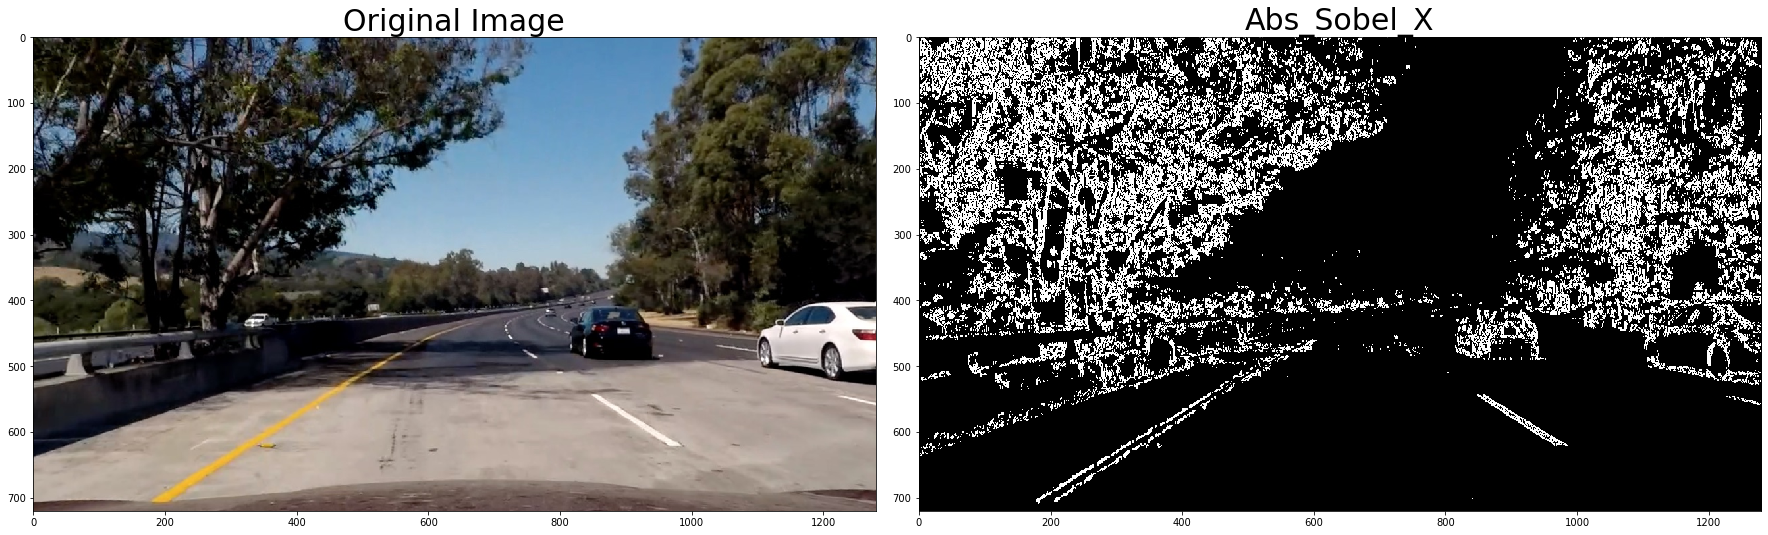

In [94]:
abs_sobel_x = abs_sobel_thresh(undistorted_test_image_gray,orient='x',sobel_kernel=3,thresh_min=20,thresh_max=240)
# Plot the result6
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(undistorted_test_image);  ax1.set_title('Original Image',       fontsize=30);
ax2.imshow(abs_sobel_x, cmap='gray'); ax2.set_title('Abs_Sobel_X', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

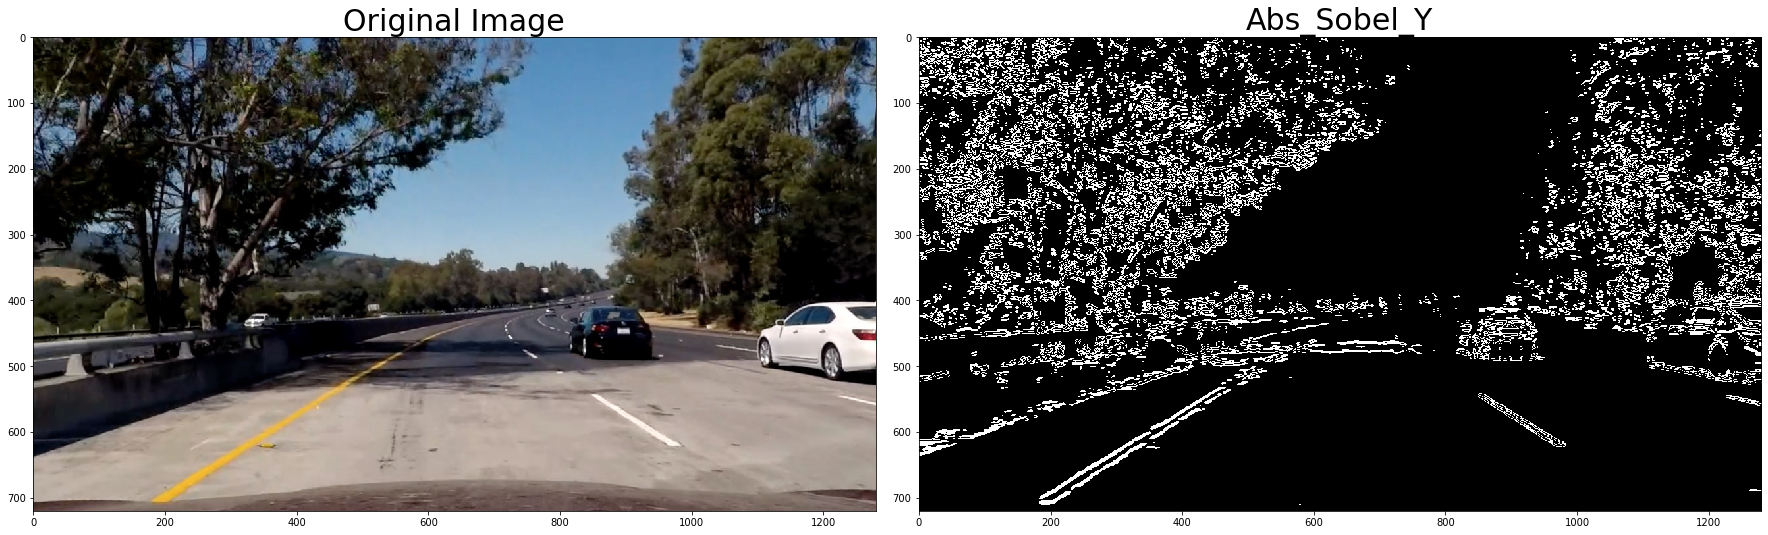

In [95]:
abs_sobel_y = abs_sobel_thresh(undistorted_test_image_gray, orient='y', sobel_kernel=7, thresh_min=40, thresh_max=120)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(undistorted_test_image);  ax1.set_title('Original Image',       fontsize=30);
ax2.imshow(abs_sobel_y, cmap='gray'); ax2.set_title('Abs_Sobel_Y', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Then, obtain the "best" results for Sobel in the X direction

### - Magnitude of the Gradient

In [96]:
def mag_thresh(gray_img, sobel_kernel=3, thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= thresh_min) & (gradmag <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
#     binary_output = np.copy(img) # Remove this line
    return binary_output

In [ ]:
mag_sobel = mag_thresh(undistorted_test_image_gray, sobel_kernel=15, thresh_min=90, thresh_max=200)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(undistorted_test_image); ax1.set_title('Original Image', fontsize=30)
ax2.imshow(mag_sobel, cmap='gray'); ax2.set_title('Magnitude Sobel', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### - Direction of the Gradient

In [ ]:
def dir_threshold(gray_img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    # 5) Create a binary mask where direction thresholds are met
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
#     binary_output = np.copy(img) # Remove this line
    return binary_output

In [ ]:
# Run the function
dir_sobel = dir_threshold(undistorted_test_image_gray, sobel_kernel=15, thresh=(0.7, 1.1))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(undistorted_test_image); ax1.set_title('Original Image',         fontsize=30)
ax2.imshow(dir_sobel, cmap='gray');  ax2.set_title('Direction Sobel', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

<font size="4"> Dir. sobel outout is extremely noisy. So, we need to combin sobels</font>

In [ ]:
def combin_sobel(abs_sobel_x, abs_sobel_y, mag_sobel, dir_sobel):
    combin = np.zeros_like(dir_sobel)
    # Sobel X returned the best output so we keep all of its results. We perform a binary and on all the other sobels    
    combin[(abs_sobel_x == 1) | ((abs_sobel_y == 1) & (mag_sobel == 1) & (dir_sobel == 1))] = 1
    return combin

In [ ]:
comb_sobel = combin_sobel(abs_sobel_x, abs_sobel_y, mag_sobel, dir_sobel)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(undistorted_test_image); ax1.set_title('Original Image', fontsize=30)
ax2.imshow(comb_sobel, cmap='gray'); ax2.set_title('Combin Sobel', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


# Color and Gradient Thresholding

In [ ]:
# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack((np.zeros_like(comb_sobel), comb_sobel, undistorted_y_w_hls)) * 255
color_binary = color_binary.astype(np.uint8)


# combined_binaries = [[color_binary, combined_binary]]
# combined_binaries_lbs = np.asarray([["Stacked Thresholds", "Combined Color And Gradient Thresholds"]])

In [ ]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(undistorted_test_image); ax1.set_title('Original Image', fontsize=30)
ax2.imshow(color_binary, cmap='gray'); ax2.set_title('Combin Sobel', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
combin_binary = np.zeros_like(undistorted_y_w_hls)
combin_binary[(comb_sobel == 1) | (undistorted_y_w_hls == 1)] = 1

In [ ]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(color_binary); ax1.set_title('Color Binary', fontsize=30)
ax2.imshow(combin_binary, cmap='gray'); ax2.set_title('Combin Binary', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

<font size="3">The goals / steps of this project are the following:

- Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
- Apply a distortion correction to raw images.
- Use color transforms, gradients, etc., to create a thresholded binary image.
- Apply a perspective transform to rectify binary image ("birds-eye view").
- Detect lane pixels and fit to find the lane boundary.
- Determine the curvature of the lane and vehicle position with respect to center.
- Warp the detected lane boundaries back onto the original image.
- Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.</font>

# Step 4: Apply a perspective transform to rectify binary image ("birds-eye view").

### Draw polyline and Fit a polynomial

In [ ]:
# test_image = np.copy(undistorted_test_image)
test_image = np.copy(undist_images[2])
(width, length) = (test_image.shape[0] - 1, test_image.shape[1] - 1) 
print(width)
print(length)
# aoi = np.array([[220,width],[595,450],[725,450], [length-95, width]], np.int32)
aoi = np.array([[210,width],[595,450],[690,450], [1110, width]], np.int32)
cv2.polylines(test_image,[aoi],True,(255,0,0), 10)
plt.axis('off')
plt.imshow(test_image)

In [ ]:
# Compute the perspective transform
def get_perspective_transform_matrices(src, dst):
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)    
    return (M, Minv)

In [ ]:
# Warp an image using the perspective transform, M
def get_perspective_transform(img, src, dst):   
    M = cv2.getPerspectiveTransform(src, dst)
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

In [ ]:
src = aoi.astype(np.float32)
dst = np.array([[200, width], [200, 0], [1000, 0], [1000, width]], np.float32)
# dst = np.array([[220,width],[595,450],[725,450], [length-95, width]], np.float32)
pers_trans_image = get_perspective_transform(undistorted_test_image, src, dst)
# plt.imshow(pers_trans_image)

fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].imshow(undistorted_test_image)
ax[0].set_title("Original")

ax[1].imshow(pers_trans_image)
ax[1].set_title("Perspective Transform")

plt.show()

In [ ]:
M, Minv = get_perspective_transform_matrices(src, dst)

In [ ]:
pers_trans_images = np.asarray(list(map(lambda img: get_perspective_transform(img, src, dst), undist_images)))
# print(len(pers_trans_images))
# plt.imshow(pers_trans_images[1])

In [ ]:
test_pers_image = np.copy(pers_trans_images[2])
dst_pnt = dst.astype(np.int32)
cv2.polylines(test_pers_image,[dst_pnt],True,(255,0,0), 10)

fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].imshow(pers_trans_images[5])
ax[0].set_title("Perspecting Transform - Curved Lines")

ax[1].imshow(test_pers_image)
ax[1].set_title("Perspective Transform - Straight Lines")

plt.show()

In [ ]:
undist_images_and_pers_trans       = np.asarray(list(zip(undist_images, pers_trans_images)))
undist_images_and_pers_trans_names = np.asarray(list(zip(undist_images_names, undist_images_names)))

In [ ]:
show_all_images(undist_images_and_pers_trans, undist_images_and_pers_trans_names, cols = 2, fig_size = (20,20))

In [ ]:
def get_all_thresh_binary_image(img):
#     l_channel = get_lab(imge)[:,:,0]
    s_channel = get_hls(img)[:,:,2]
#     s_channel = get_grayscale(S)
#     thresh=(80, 255)
#     binary = np.zeros_like(s_channel)
#     binary[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    
    abs_sobel_x = abs_sobel_thresh(s_channel, orient='x', sobel_kernel=3, thresh_min=20, thresh_max=240)
    abs_sobel_y = abs_sobel_thresh(s_channel, orient='y', sobel_kernel=3, thresh_min=20, thresh_max=240)
    mag_sobel = mag_thresh(s_channel, sobel_kernel=3, thresh_min=90, thresh_max=200) #90  80,200
    dir_sobel = dir_threshold(s_channel, sobel_kernel=3, thresh=(0.7,1.1)) #0.7,1.1   np.pi/4, np.pi/2
    comb_sobel = combin_sobel(abs_sobel_x, abs_sobel_y, mag_sobel, dir_sobel)
    
    y_w_hls = get_y_w_hls_images(img)
    combined_binary = np.zeros_like(y_w_hls)
    combined_binary[(comb_sobel == 1) | (y_w_hls == 1)] = 1
    return combined_binary

In [ ]:
# test_image = undist_images[4]
test_image = undistorted_test_image
all_thresh_binary_image = get_all_thresh_binary_image(test_image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image);
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(all_thresh_binary_image, cmap='gray');
ax2.set_title('All Thresh', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
def combine_allthresh_and_transform(img):
    pers_img = get_perspective_transform(img, src, dst)
    binary_img = get_all_thresh_binary_image(pers_img)
    return binary_img

In [ ]:
test_image = undist_images[4]
# test_image = undistorted_test_image
pers_binary_image = combine_allthresh_and_transform(test_image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(all_thresh_binary_image, cmap='gray');
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(pers_binary_image, cmap='gray');
ax2.set_title('All Thresh', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
all_thresh_binary_images = np.asarray(list(map(lambda img: get_all_thresh_binary_image(img), undist_images)))
# print(len(all_thresh_binary_images))

In [ ]:
all_pers_trans_images = np.asarray(list(map(lambda img: get_perspective_transform(img, src, dst), undist_images)))

In [ ]:
all_thresh_comb_pers_trans_images = np.asarray(list(map(lambda img: get_perspective_transform(img, src, dst), all_thresh_binary_images)))

In [ ]:
all_thresh_comb_and_pers_trans = np.asarray(list(zip(all_pers_trans_images[:,:,:,0],all_thresh_binary_images, all_thresh_comb_pers_trans_images)))
all_thresh_comb_and_pers_trans_names = np.asarray(list(zip(undist_images_names,undist_images_names, undist_images_names)))

In [ ]:
show_all_images(all_thresh_comb_and_pers_trans, all_thresh_comb_and_pers_trans_names, cols=3, fig_size=(30, 30))
# show_images(all_thresh_binary_images, undist_images_names, pref = "", cols = 2)

<font size="3">The goals / steps of this project are the following:

- Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
- Apply a distortion correction to raw images.
- Use color transforms, gradients, etc., to create a thresholded binary image.
- Apply a perspective transform to rectify binary image ("birds-eye view").
- **Detect lane pixels and fit to find the lane boundary.**
- Determine the curvature of the lane and vehicle position with respect to center.
- Warp the detected lane boundaries back onto the original image.
- Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.</font>

# Step 5:  Detect Lane pixels and Determine the curvature

In [ ]:
print(len(all_thresh_comb_pers_trans_images))
binary_warped = all_thresh_comb_and_pers_trans[4][2]
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
fig, ax = plt.subplots(1, 2, figsize=(15,4))
ax[0].imshow(binary_warped, cmap='gray')
ax[0].axis("off")
ax[0].set_title("Perspective Transform")

ax[1].plot(histogram)
ax[1].set_title("Histogram")

plt.show()

In [ ]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
def get_fit_and_lanes(img, nwindows=9, margin=110, minpix=50):
    
    # Make a binary and transform image
    binary_warped = combine_allthresh_and_transform(img)
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base; rightx_current = rightx_base 
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []; right_lane_inds = []
    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Fit a second order polynomial to each
    left_m_per_pix = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_m_per_pix = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    
#     return (nonzerox, nonzeroy, out_img, left_fit, right_fit, left_m_per_pix, right_m_per_pix, left_lane_inds, right_lane_inds)
    return (left_fit, right_fit, left_m_per_pix, right_m_per_pix, left_lane_inds, right_lane_inds, out_img, nonzerox, nonzeroy)

In [ ]:
def draw_lanes(img, ax):
    
#     nonzerox, nonzeroy, out_img, left_fit, right_fit, left_m_per_pix, right_m_per_pix, left_lane_inds, right_lane_inds = get_fit_and_lanes(img)
    left_fit, right_fit, left_m_per_pix, right_m_per_pix, left_lane_inds, right_lane_inds, out_img, nonzerox, nonzeroy = get_fit_and_lanes(img)
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0])
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    ax.imshow(out_img)
    ax.plot(left_fitx, ploty, color='yellow')
    ax.plot(right_fitx, ploty, color='yellow')
    return ( left_fit, right_fit, left_m_per_pix, right_m_per_pix )

In [ ]:
def get_poly_fit_images(binary_images, names, cols = 2, rows = 4, figsize=(15,15)):
# def get_poly_fit_images(binary_images, undist_images_names, cols = 2, rows = 4, figsize=(15,15)):
    
    num_images = len(binary_images)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    indexes = range(cols * rows)
    fit_images = []
    for ax, index in zip(axes.flat, indexes):
        if index < num_images:
            img = binary_images[index]
            left_fit, right_fit, left_m_per_pix, right_m_per_pix = draw_lanes(img, ax)
            ax.set_title(names[index])
            ax.axis('off')
            fit_images.append((names[index], left_fit, right_fit, left_m_per_pix, right_m_per_pix))
    
    return fit_images

In [ ]:
#Get all fits for the images and lane boundary
# poly_lanes_images = get_poly_fit_images(all_thresh_comb_pers_trans_images, undist_images_names)

poly_lanes_images = get_poly_fit_images(test_images_list, undist_images_names)
# poly_lanes_images = show(test_images_pair, get_poly_fit_images)

In [ ]:
def get_curvature(y_val, left_fit_cr):
    return ((1 + (2*left_fit_cr[0]*y_val*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])

In [ ]:
for img in poly_lanes_images:
    image_name, left_fit, right_fit, left_m_per_pix, right_m_per_pix = img
    y_val = 719
    # Calculation of R_curve (radius of curvature)
    left_curv =  get_curvature(y_val, left_m_per_pix)
    right_curv = get_curvature(y_val, right_m_per_pix)
    print('{}: left_curv= {:.2f} m, right_curv= {:.2f} m'.format(image_name, left_curv, right_curv))

<font size="3">The goals / steps of this project are the following:

- Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
- Apply a distortion correction to raw images.
- Use color transforms, gradients, etc., to create a thresholded binary image.
- Apply a perspective transform to rectify binary image ("birds-eye view").
- Detect lane pixels and fit to find the lane boundary.
- **Determine the curvature of the lane and vehicle position with respect to center.**
- Warp the detected lane boundaries back onto the original image.
- Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.</font>

# Step 6: Warp the detected lane boundaries back onto the original image

In [ ]:
def draw_poly(img, left_fit, right_fit):
    
    yMax = img.shape[0]
    ploty = np.linspace(0, yMax - 1, yMax)
    color_warp = np.zeros_like(img).astype(np.uint8)
    # Calculate points.
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_pnts = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    right_pnts = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((left_pnts, right_pnts))
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 
    return cv2.addWeighted(img, 1, newwarp, 0.3, 0)

In [ ]:
def draw_on_image(img):
    left_fit, right_fit, left_fit_m, right_fit_m, _, _, _, _, _ = get_fit_and_lanes(img)
#     _, _, _, left_fit, right_fit, left_m_per_pix, right_m_per_pix, _, _ = get_fit_and_lanes(img)
    output = draw_poly(img, left_fit, right_fit)
    return cv2.cvtColor( output, cv2.COLOR_BGR2RGB )

In [ ]:
# resultLines = applyAndShow(test_images_pair, draw_lane)
# lane_lines_images[0] = draw_on_image(test_image)
lane_lines_images = np.asarray(list(map(lambda img: draw_on_image(img), test_images_list)))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image);
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(lane_lines_images[0]);
ax2.set_title('Lane lines ', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
# poly_on_images = np.asarray(list(map(lambda img: draw_lane(img), all_thresh_comb_and_pers_trans_names)))
# show_all_images(draw_lane, all_thresh_comb_and_pers_trans_names, cols=3, fig_size=(30, 30))
out_images = show(test_images_pair, draw_on_image)
# out = draw_lane(all_thresh_comb_pers_trans_images)
# plt.imshaow(out[0])

# Step 7: Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position

In [ ]:
def visual_lane_cur_pos(img, fontScale=2):
    
    left_fit, right_fit, left_fit_m, right_fit_m, _, _, _, _, _ = get_fit_and_lanes(img)
    output = draw_poly(img, left_fit, right_fit)
    
    # Calculate curvature
    l_curvature = get_curvature(y_val, left_fit_m) 
    r_curvature = get_curvature(y_val, right_fit_m)
    
    # Calculate vehicle center
    max_x = img.shape[1]*xm_per_pix
    max_y = img.shape[0]*ym_per_pix
    center = max_x / 2
    l_line = left_fit_m[0]*max_y**2 + left_fit_m[1]*max_y + left_fit_m[2]
    r_line = right_fit_m[0]*max_y**2 + right_fit_m[1]*max_y + right_fit_m[2]
    m_line = l_line + (r_line - l_line)/2
    diff = m_line - center
    if diff > 0:
        message = '{:.2f} m right'.format(diff)
    else:
        message = '{:.2f} m left'.format(-diff)
    
    # Draw info
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontColor = (255, 255, 255)
    cv2.putText(output, 'L_curvature: {:.0f} m'.format(l_curvature), (50, 50), font, fontScale, fontColor, 2)
    cv2.putText(output, 'R_curvature: {:.0f} m'.format(r_curvature), (50, 120), font, fontScale, fontColor, 2)
    cv2.putText(output, 'Cam. {} of center'.format(message), (50, 190), font, fontScale, fontColor, 2)
    return output

In [ ]:
visual_lane_images = show(test_images_pair, lambda img: cv2.cvtColor(visual_lane_cur_pos(img), cv2.COLOR_BGR2RGB ))

# Test on Video

### Capture images from the challenge for the shaded area

In [ ]:
# def extract_frames(movie, times, out_path):
#     clip = VideoFileClip(movie)
#     for t in times:
#         imgpath = os.path.join(out_path, 'challenge_{}.jpg'.format(t))
#         print(imgpath)
#         clip.save_frame(imgpath, t)



In [ ]:
# movie = 'test_videos/challenge.mp4'
# out_path = 'test_images/'
# times = 3.0, 3.3, 3.456, 3.6, 3.8, 3.95

# extract_frames(movie, times, out_path)

In [ ]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

class Lane():
    def __init__(self):
        self.l_fit = None
        self.r_fit = None
        self.l_fit_m = None
        self.r_fit_m = None
        self.l_curvature = None
        self.r_curvature = None

def get_lanes(img):
    
    l_fit, r_fit, l_fit_m, r_fit_m, _, _, _, _, _ = get_fit_and_lanes(img)
    # Calculate curvature
    l_curvature = get_curvature(y_val, l_fit_m) 
    r_curvature = get_curvature(y_val, r_fit_m)
    
    # Calculate vehicle center
    max_x = img.shape[1]*xm_per_pix
    max_y = img.shape[0]*ym_per_pix
    center = max_x / 2
    l_line = l_fit_m[0]*max_y**2 + l_fit_m[1]*max_y + l_fit_m[2]
    r_line = r_fit_m[0]*max_y**2 + r_fit_m[1]*max_y + r_fit_m[2]
    m_line = l_line + (r_line - l_line)/2
    diff = m_line - center
    
    return (l_fit, r_fit, l_fit_m, r_fit_m, l_curvature, r_curvature, diff)

def show_lanes(img, l_fit, r_fit, l_fit_m, r_fit_m, l_curvature, r_curvature, diff):
    
    output = draw_poly(img, l_fit, r_fit)
    
    if diff > 0:
        message = '{:.2f} m right'.format(diff)
    else:
        message = '{:.2f} m left'.format(-diff)
    
    # Draw info
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_color = (255, 255, 255)
    cv2.putText(output, 'L_curvature: {:.0f} m'.format(l_curvature), (50, 50), font, 1, font_color, 2)
    cv2.putText(output, 'R_curvature: {:.0f} m'.format(r_curvature), (50, 120), font, 1, font_color, 2)
    cv2.putText(output, 'Cam. {} of center'.format(message), (50, 190), font, 1, font_color, 2)
    
    return output
    
def get_video(test_video, out_video_name):
    
    in_clip = VideoFileClip(test_video)
    l_lane = Lane()
    r_lane = Lane()
    
    def process_image(img):
        l_fit, r_fit, l_fit_m, r_fit_m, l_curvature, r_curvature, diff = get_lanes(img)
        if l_curvature > 10000:
            l_fit = l_lane.l_fit
            l_fit_m = l_lane.l_fit_m
            l_curvature = l_lane.l_curvature
        else:
            l_lane.l_fit = l_fit
            l_lane.l_fit_m = l_fit_m
            l_lane.l_curvature = l_curvature
        
        if r_curvature > 10000:
            r_fit = r_lane.r_fit
            r_fit_m = r_lane.r_fit_m
            r_curvature = r_lane.r_curvature
        else:
            r_lane.r_fit = r_fit
            r_lane.r_fit_m = r_fit_m
            r_lane.r_curvature = r_curvature
            
        return show_lanes(img, l_fit, r_fit, l_fit_m, r_fit_m, l_curvature, r_curvature, diff)

    clip = in_clip.fl_image(process_image)
    %time clip.write_videofile(out_video_name, audio=False)



In [ ]:
output_video = './output_video/project_video.mp4'
input_video  = 'project_video.mp4'
get_video(input_video, output_video)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_video))